In [1]:
# Load coordinates of all frames of all simualtions

In [1]:
import os
from tqdm import tqdm
from glob import glob
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import pandas as pd
import numpy as np
import pickle
os.chdir('/home/amorales/Documents/projects/bias_2')

from sklearn.decomposition import PCA

In [61]:
# Select residues to include
secondary_structure_path = 'data/interim/secondary_tructure.pdb'

u = mda.Universe(secondary_structure_path)

secondary_structure_residues = [r.resid for r in u.select_atoms('name CA').residues]

/home/amorales/.virtualenvs/bias/lib64/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [4]:
# Compute positions dataframe if a pickle file does not exist, else load it

rmsf_list = []
systems = []

ds_array = []
sys_name_list = []
for system_path in tqdm(glob('data/interim/aligned_sims/*')):
    if os.path.isdir(system_path):

        # Get the topology file path
        top = glob(f"{system_path}/*psf")[0]
        # Extract system mutant name from path
        system = system_path.split('/')[-1]
        # Get the list of trajectory files
        traj_list = glob(f"{system_path}/*.dcd")

        for traj in traj_list:
            sys_name_list.append(system)
            # Load simulation
            u = mda.Universe(top, traj)
            sim_array = []
            for ts in u.trajectory:
                c_alfa = u.select_atoms('name CA')
                sim_array.append(c_alfa.positions)
                
            sim_array = np.stack(sim_array)
            ds_array.append(sim_array)

ds_array = np.stack(ds_array)

100%|██████████| 36/36 [08:18<00:00, 13.84s/it]


In [5]:
sys_name_list = [j for i in sys_name_list  for j in [i] * 400 ]

In [6]:
ds_array = ds_array.reshape((-1, 289*3))

In [7]:
ds_df = pd.DataFrame(ds_array)
res_coord = [f"{r}_{c}" for r in [r.resid for r in c_alfa.residues]  for c in ['x', 'y', 'z'] if r in secondary_structure_residues]
ds_df.columns = res_coord
ds_df['sys'] = sys_name_list

In [8]:
ds_df.to_csv('data/interim/alpha_positions.csv')

In [2]:
ds_df = pd.read_csv('data/interim/alpha_positions.csv')

In [93]:
ds_df

,22_x,22_y,22_z,23_x,23_y,23_z,24_x,24_y,24_z,32_x,...,315_y,315_z,316_x,316_y,316_z,317_x,317_y,317_z,sys,profile
0,27.130747,33.291977,122.263931,29.785711,31.213940,124.130966,26.834969,29.339006,125.963150,31.649921,...,29.042673,82.692757,50.522686,31.242346,85.032829,50.142109,28.790611,88.002037,109,1.0
1,26.411964,32.993061,121.627975,29.259802,31.050310,123.558891,26.643511,28.895555,125.429611,31.219063,...,28.389389,80.997681,49.616566,30.530096,83.215309,49.039085,28.149738,86.192780,109,1.0
2,26.427015,33.079185,122.202164,29.379923,31.313513,124.010742,26.840790,29.233622,125.863937,31.311216,...,28.243439,81.008865,49.141396,30.696842,83.081299,49.143394,28.783583,86.361496,109,1.0
3,26.985468,32.513424,122.412766,28.939913,30.207756,124.738571,25.727457,29.006823,126.447151,31.009296,...,30.469971,79.481598,49.855663,32.822155,81.192200,49.733208,30.888086,84.616753,109,1.0
4,27.653616,33.002209,123.709702,29.851833,30.919514,126.141220,27.341412,28.170710,126.891907,31.615372,...,29.569834,77.351105,49.844639,32.205406,77.984276,51.174759,30.615158,81.195145,109,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,26.395346,30.009539,123.465981,27.118198,26.271915,123.927559,23.721376,25.083910,122.313301,33.815441,...,33.169392,79.337219,49.804779,36.413639,80.552238,50.917984,34.701954,83.719849,WT,0.0
71996,26.374062,30.143612,124.399849,26.694828,26.304522,124.502769,23.374191,25.656866,122.675636,33.007862,...,33.983696,77.691132,49.848923,36.545277,79.919022,51.126110,33.697979,82.353691,WT,0.0
71997,26.354815,30.037649,123.380264,26.715534,26.213469,124.119202,23.593569,25.154718,122.265228,33.624271,...,32.877647,78.351402,49.763432,35.889015,79.627647,51.057499,33.719013,82.427803,WT,0.0
71998,26.313505,30.075546,123.499641,26.778385,26.318848,124.075912,23.597237,25.632225,122.056084,33.390530,...,34.635979,78.434059,49.287201,38.117985,80.001259,51.030014,36.383335,82.948853,WT,0.0


In [9]:
pca=PCA(2)

In [72]:
pc_array = pca.fit_transform(ds_df.drop(['sys', 'profile'], axis=1))

In [77]:
comp = abs(pca.components_[0])
q = np.percentile(comp, 90)

important_res_idx = np.where(comp > q)
important_res_list = ds_df.drop(['sys', 'profile'], axis=1).columns[important_res_idx]


In [78]:
' '.join(np.unique([c.split('_')[0] for c in important_res_list]))

'131 132 133 134 135 136 140 141 142 143 144 213 215 216 217 218 219 220 221 222 239 240 241 242 243 244 245 247 297 299 300 301 302 304 305 306 307 308 309 310 311 32 33 34 35 36 62 63 64 66 68 69 70 71 73'

In [79]:
pc_df = pd.DataFrame(pc_array, columns=['pc1', 'pc2'])

In [80]:
pc_df['sys'] = sys_name_list

In [81]:
profile_df = pd.read_csv('data/interim/signaling_df.csv')

In [82]:
profile_dict = dict(profile_df.values)
profile_dict = {str(k): v for k, v in profile_dict.items()}
profile_dict['WT'] = 0

In [83]:
pc_df['profile'] = pc_df.sys.apply(lambda x: profile_dict.get(x)).astype(str)

In [84]:
pc_df

,pc1,pc2,sys,profile
0,-9.079332,10.029490,109,1.0
1,-8.636520,6.968709,109,1.0
2,-3.823509,8.225539,109,1.0
3,-1.548142,5.778491,109,1.0
4,-5.986131,7.067290,109,1.0
...,...,...,...,...
71995,-8.672891,4.404319,WT,0.0
71996,-8.069120,1.672772,WT,0.0
71997,-7.530648,3.890799,WT,0.0
71998,-9.662139,2.232501,WT,0.0


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

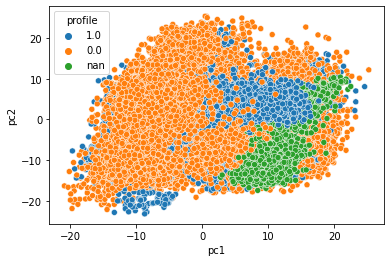

In [86]:
sns.scatterplot(data=pc_df, x='pc1', y='pc2', hue='profile')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

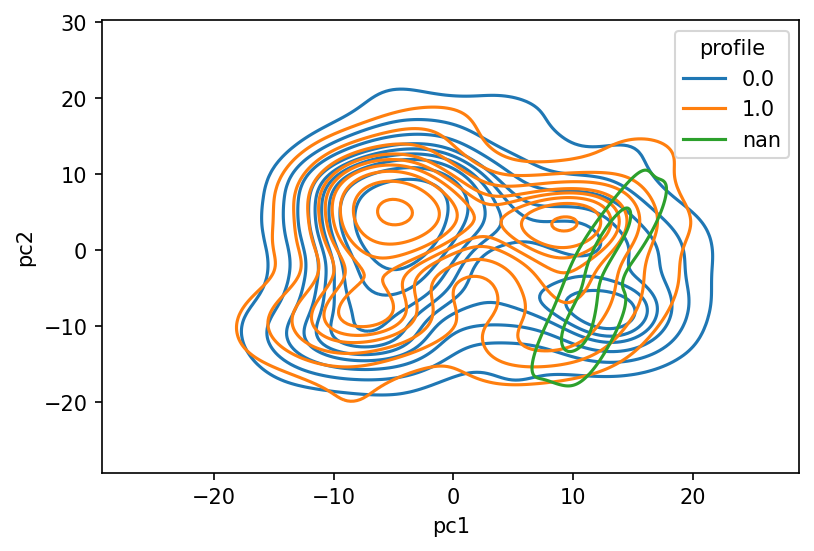

In [87]:
plt.figure(dpi=150)
sns.kdeplot(data=pc_df.sample(1000), x='pc1', y='pc2', hue='profile')

No handles with labels found to put in legend.


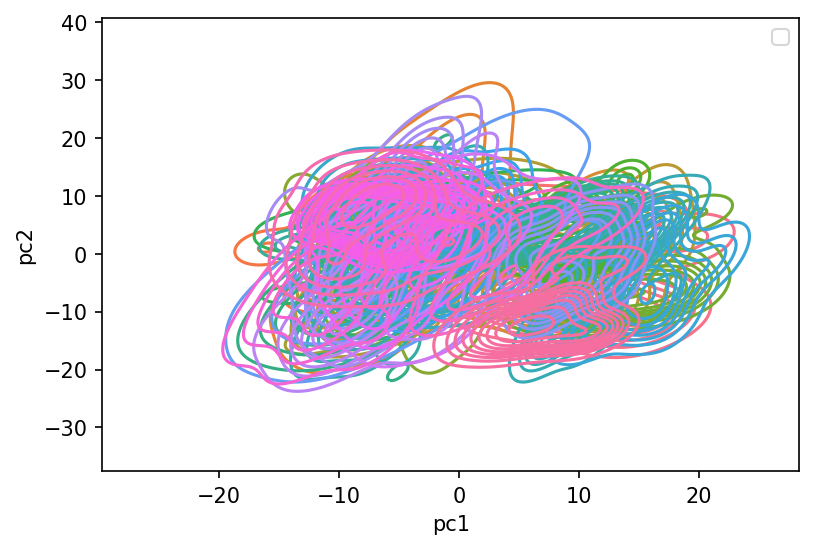

In [88]:
plt.figure(dpi=150)
sns.kdeplot(data=pc_df.sample(1000), x='pc1', y='pc2', hue='sys')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
n_clusters = 2

In [91]:
clust = AgglomerativeClustering(n_clusters, memory='cluster_cache', compute_full_tree=True)

/home/amorales/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/amorales/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


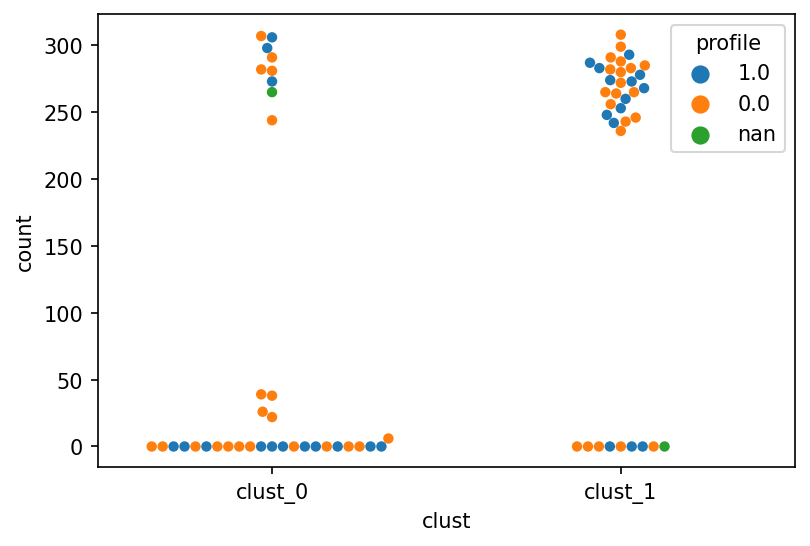

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


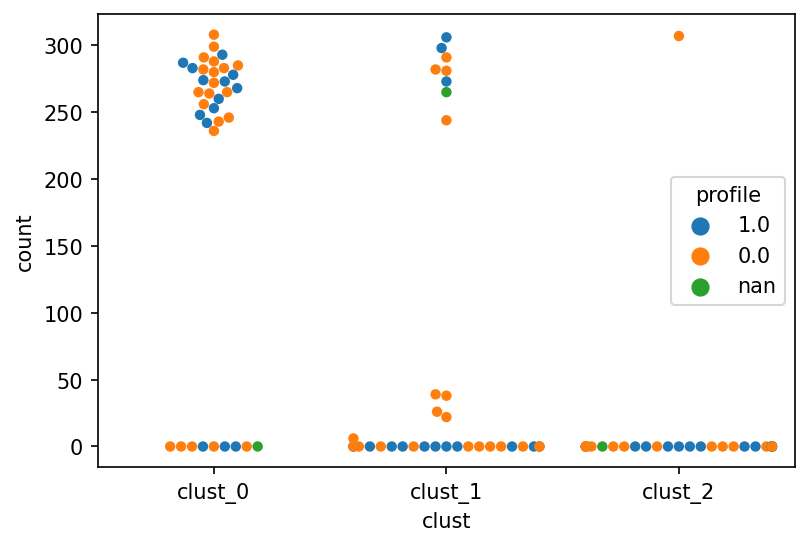

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


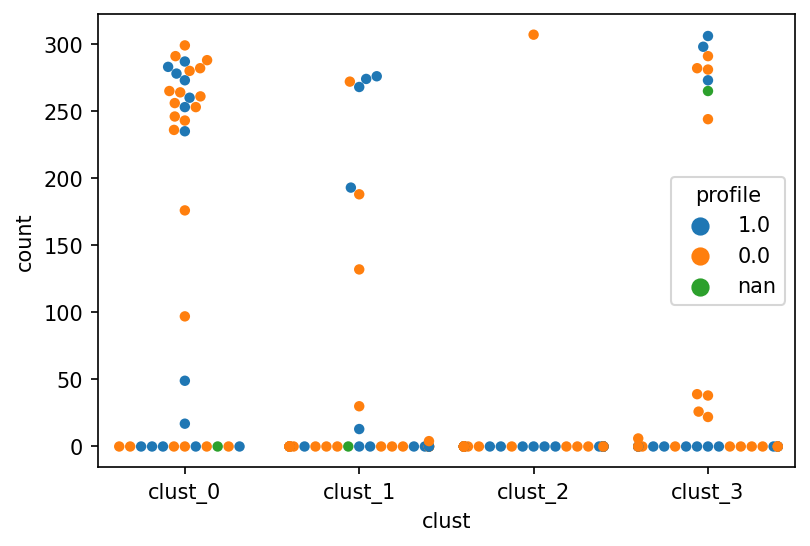

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

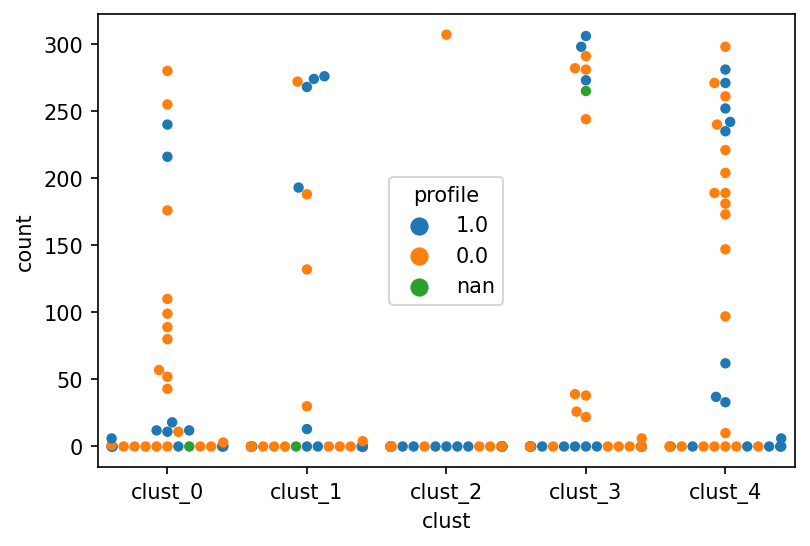

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

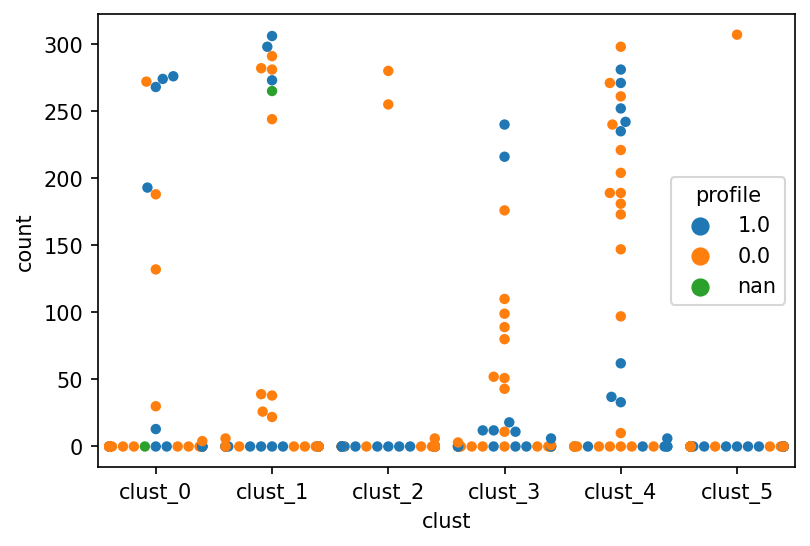

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 63.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

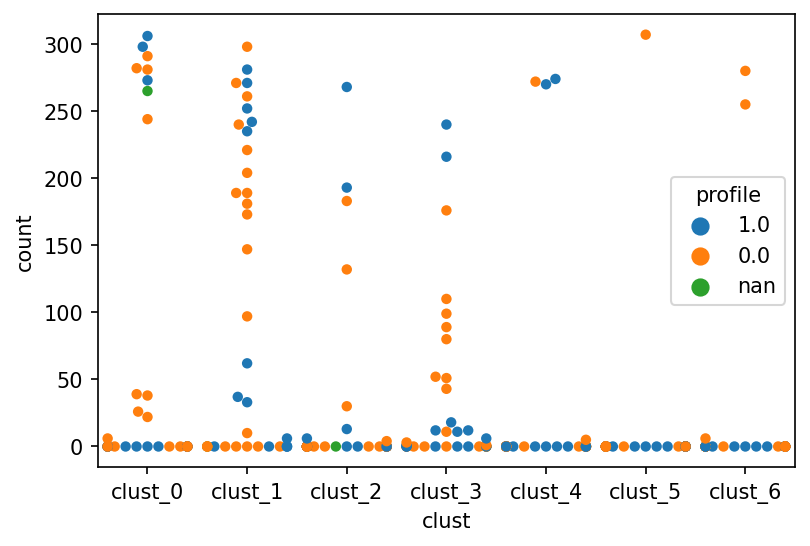

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 63.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

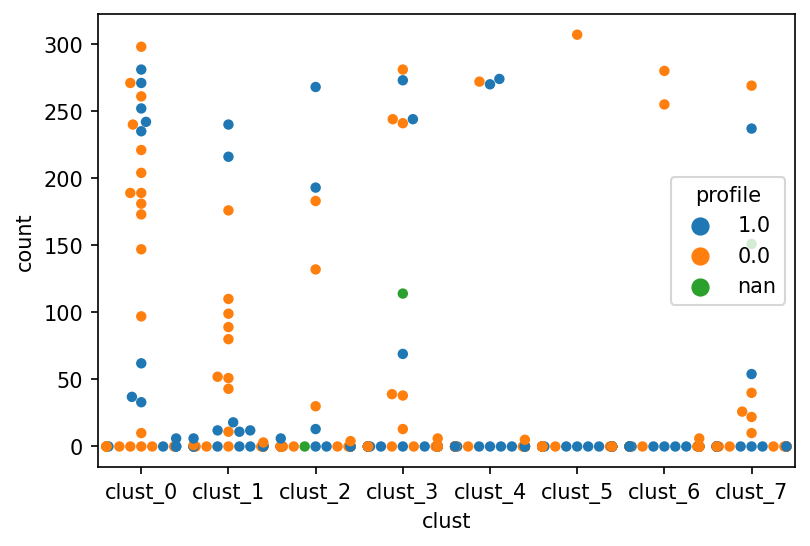

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

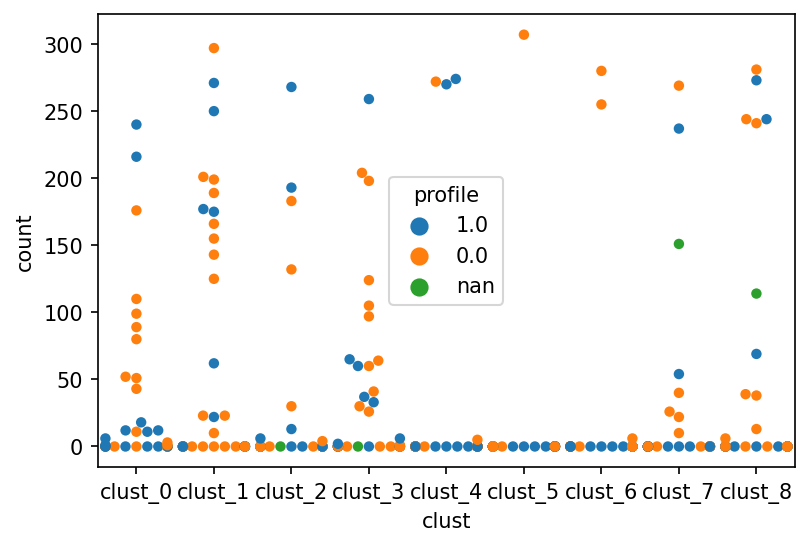

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

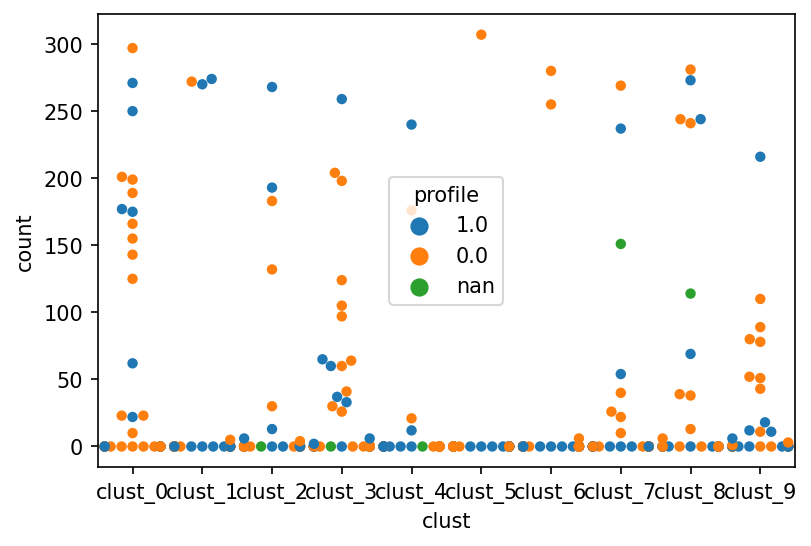

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

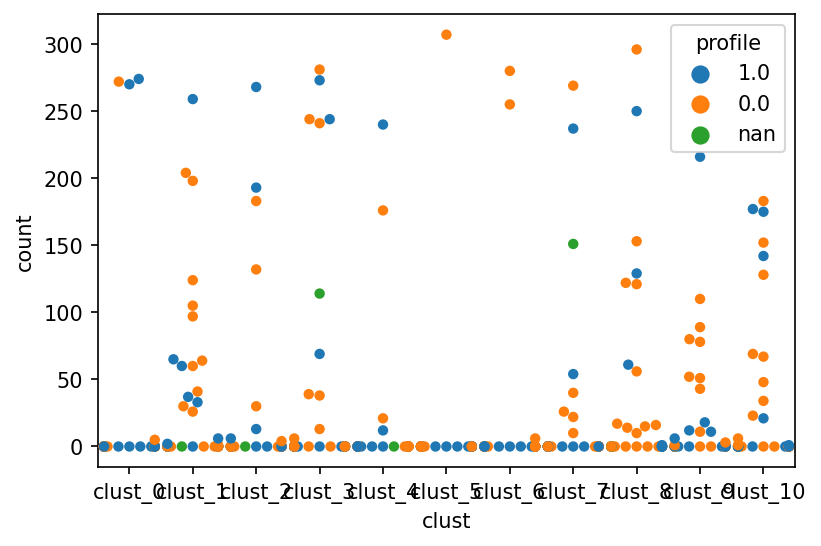

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

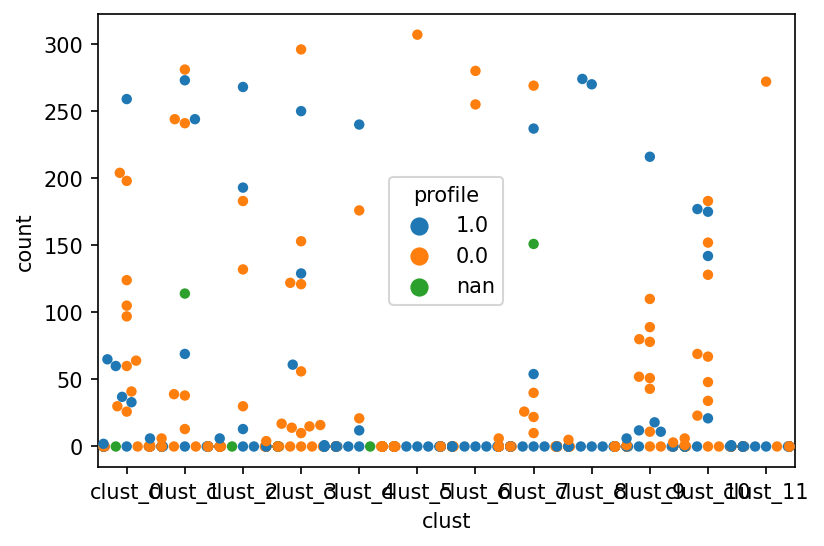

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 63.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

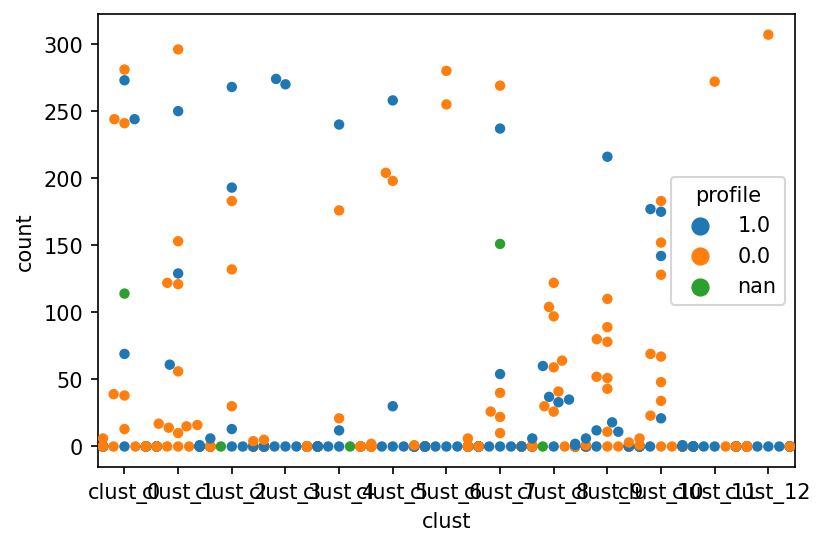

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

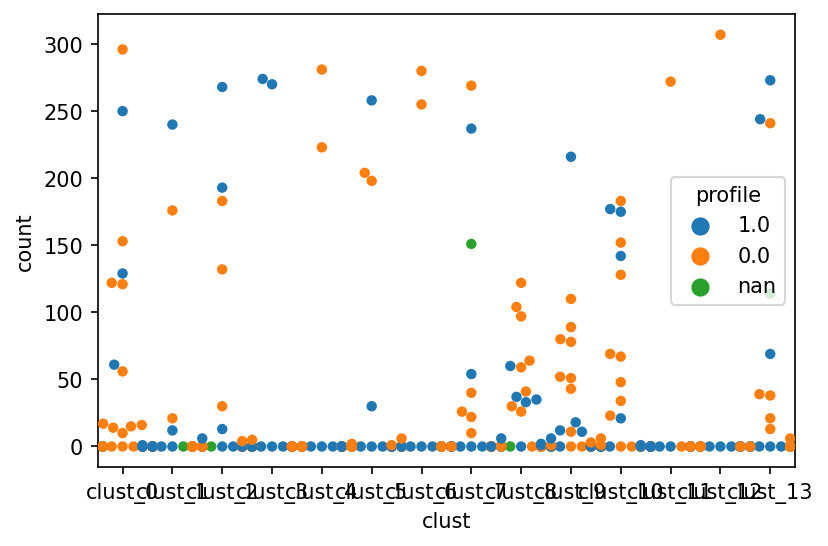

/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amorales/.virtualenvs/bias

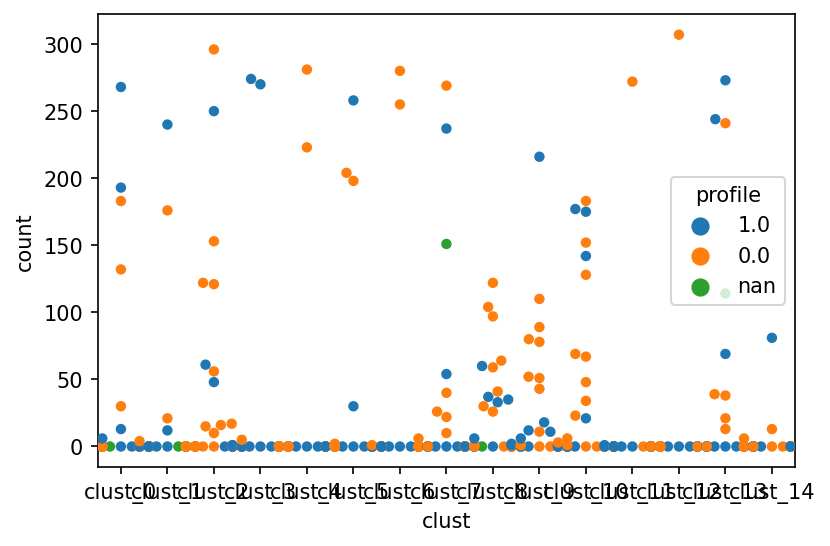

In [92]:
clust = AgglomerativeClustering(n_clusters, memory='cluster_cache', compute_full_tree=True)
ds_df['sys'] = sys_name_list
ds_df['profile'] = ds_df.sys.apply(lambda x: profile_dict.get(x)).astype(str)


sample_df = ds_df.sample(10000)
X = sample_df.drop(['sys', 'profile'], axis=1)

for n_clusters in range(2,16):
    clust.n_clusters = n_clusters
    clust.fit(X)
    sample_df['clust'] = clust.labels_
    clust_count_df = pd.DataFrame(sample_df.groupby('sys').clust.value_counts())
    clust_count_df.columns = ['count']
    clust_count_df = clust_count_df.reset_index()
    clust_count_df = clust_count_df.pivot(index='sys', columns='clust').fillna(0).reset_index()
    clust_count_df.columns = ['sys'] + [f'clust_{i}' for i in range(n_clusters)]
    clust_count_df = clust_count_df.melt(id_vars='sys')
    clust_count_df['profile'] = clust_count_df.sys.apply(lambda x: profile_dict.get(x)).astype(str)
    clust_count_df.columns = ['sys', 'clust', 'count', 'profile']

    plt.figure(dpi=150)
    sns.swarmplot(data=clust_count_df, x='clust', y='count', hue='profile')
    plt.show()

In [30]:
clust_count_df.profile

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
535    1.0
536    nan
537    1.0
538    0.0
539    0.0
Name: profile, Length: 540, dtype: object

In [60]:
clust_count_df[clust_count_df.profile =='1.0'].sys.unique().size

14

In [59]:
clust_count_df[clust_count_df.profile =='0.0'].sys.unique().size

21